visulaiz the decision tree builted

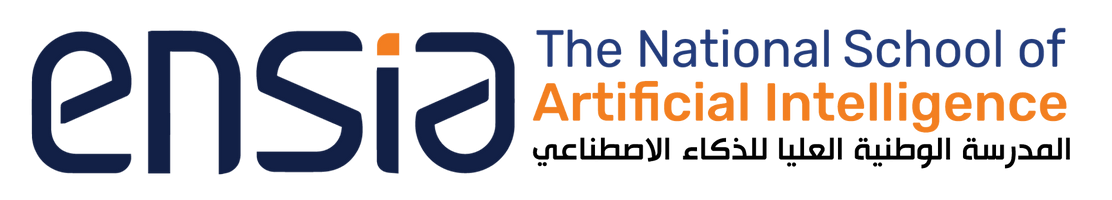

# Network Traffic Analysis for RPL Attack Detection

**Student: AHMED FOUATIH Hamza Faiz** · © 2026

## 📢 Introduction

This project focuses on **detecting RPL (Routing Protocol for Low-Power and Lossy Networks) attacks** in IoT network traffic. RPL attacks are a serious threat in constrained IoT environments, as they can disrupt routing, degrade network performance, or enable malicious activities such as packet dropping or traffic redirection.

We work with **packet-level network traffic data**, where each packet is analyzed individually to determine whether it is **benign** or **malicious**.

<p align="center">
<img src="https://www.globalsign.com/application/files/7416/3763/0034/General_Banner_WhatisIOT_4_APAC_2021_11_22.jpg" alt="Image Description" style="display:block; margin:0 auto; width:70%;">
</p>

RPL stands for Routing Protocol for Low Power and Lossy Networks for heterogeneous traffic networks. It is a routing protocol for Wireless Networks. This protocol is based on the same standard as by Zigbee and 6 Lowpan is IEEE 802.15.4 It holds both many-to-one and one-to-one communication.

It is a Distance Vector Routing Protocol that creates a tree-like routing topology called the Destination Oriented Directed Acyclic Graph (DODAG), rooted towards one or more nodes called the root node or sink node.

The Directed Acyclic Graphs (DAGs) are created based on user-specified specific Objective Function (OF). The OF defines the method to find the best-optimized route among the number of sensor devices.

<div style="text-align: center; margin: 20px 0;">
  <table style="margin: 0 auto; border: none;">
    <tr style="background: none;">
      <td style="border: none; padding: 10px;">
        <img src="https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-981-16-0878-0_78/MediaObjects/496651_1_En_78_Fig1_HTML.png" alt="First Image Description" style="max-width: 400px; height: auto;">
        <p style="margin-top: 5px; font-size: 0.9em;"><em>Updates in the network</em></p>
      </td>
      <td style="border: none; padding: 10px;">
        <img src="https://www.researchgate.net/publication/322048788/figure/fig2/AS:575291003473921@1514171471894/Flow-diagram-of-control-messages-of-RPL-protocol.png" alt="Second Image Description" style="max-width: 350px; height: auto;">
        <p style="margin-top: 5px; font-size: 0.9em;"><em>New node joined</em></p>
      </td>
    </tr>
  </table>
</div>

## 📊 Dataset Overview
The dataset we are analyzing today comes from cutting-edge academic research in IoT security. It was originally compiled and used in a 2022 study published in the journal Sensors, which focused on detecting critical routing attacks—specifically Version Number Attacks—against the RPL protocol in IoT networks

This dataset contains **network traffic data** captured at the packet level, specifically designed for detecting **RPL (Routing Protocol for Low-Power and Lossy Networks) attacks** in IoT environments. The dataset includes both **benign traffic** and **malicious traffic** associated with various RPL-based attacks that threaten IoT network security.

## 📁 Data Structure

### File Organization
- **`train_data.csv`**: Training dataset with labeled packets

### Column Descriptions 

#### **Columns in Both Train and Test Data:**

| Column Name | Description | Data Type | Example |
|-------------|-------------|-----------|---------|
| `packet_id` | Unique packet identifier | String | `PI_741404` |
| `packet_duration` | Time taken to transmit packet (seconds) | Float | `0.0470000000000254` |
| `second_frame` | Second frame identifier | String | `SF_630318` |
| `src_ip` | Source IP address | String (IPv6) | `fe80::212:7412:12:1212` |
| `dest_ip` | Destination IP address | String (IPv6) | `fe80::212:7418:18:1818` |
| `protocol` | Transmission protocol | Categorical | `ICMPv6`, `UDP`, `IEEE 802.15.4` |
| `length` | Packet size (bytes) | Integer | `76` |
| `info` | Additional packet information | Categorical | `RPL Control (Destination Advertisement Object)` |

#### **Column Only in Training Data:**
| Column Name | Description | Values |
|-------------|-------------|---------|
| `target` | Binary classification label | `0`: Benign, `1`: Malicious |


<p align="center">
<img src="https://mdpi-res.com/sensors/sensors-22-07052/article_deploy/html/images/sensors-22-07052-g001.png" alt="Image Description" style="display:block; margin:0 auto; width:70%;">
</p>



## 🎯 Prediction Task

### Objective
**Binary classification** task where we predict the probability that a given network packet is associated with an RPL attack.

### Output Format
- **Prediction**: Probability score between `[0, 1]`

## 🔍 Feature Details

### Protocol Types
The dataset contains three main protocol types:
- **ICMPv6**: Internet Control Message Protocol for IPv6
- **IEEE 802.15.4**: Wireless personal area network standard (common in IoT)
- **UDP**: User Datagram Protocol

### Info Field Categories
The `info` column contains several packet information types:
1. **`info_Ack`** - Acknowledgment packets
2. **`info_RPL Control (DODAG Information Object)`** - RPL control messages
3. **`info_RPL Control (DODAG Information Solicitation)`** - RPL solicitation messages
4. **`info_RPL Control (Destination Advertisement Object)`** - RPL advertisement messages
5. **`info_Source port: ultraseek-http Destination port: rrac`** - Port information
6. **`info_Unknown (17)`** - Unidentified packet types


# Setup Imports and Variables

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import ipaddress
import warnings
from sklearn.datasets import load_iris, load_breast_cancer, fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
import joblib


# Explore and Clean the Data

In [55]:
df = pd.read_csv('train_data.csv')
df = df.drop('packet_id', axis=1)
df.head()

,packet_duration,second_frame,src_ip,dest_ip,protocol,length,info,target
0,0.047,SF_630318,fe80::212:7412:12:1212,fe80::212:7418:18:1818,ICMPv6,76,RPL Control (Destination Advertisement Object),0
1,0.001,SF_367074,fe80::212:7443:43:4343,fe80::212:7411:11:1111,ICMPv6,76,RPL Control (Destination Advertisement Object),1
2,0.009,SF_526833,fe80::212:7418:18:1818,fe80::212:7455:55:5555,ICMPv6,76,RPL Control (Destination Advertisement Object),0
3,0.430,SF_935887,fe80::212:740b:b:b0b,fe80::212:7421:21:2121,ICMPv6,102,RPL Control (DODAG Information Object),1
4,0.188,SF_272413,fe80::212:743a:3a:3a3a,fe80::212:7408:8:808,ICMPv6,76,RPL Control (Destination Advertisement Object),0


In [56]:
df.shape

(11663, 8)

In [57]:
df.dtypes

packet_duration    float64
second_frame        object
src_ip              object
dest_ip             object
protocol            object
length               int64
info                object
target               int64
dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11663 entries, 0 to 11662
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   packet_duration  11663 non-null  float64
 1   second_frame     11663 non-null  object 
 2   src_ip           11576 non-null  object 
 3   dest_ip          11576 non-null  object 
 4   protocol         11663 non-null  object 
 5   length           11663 non-null  int64  
 6   info             11663 non-null  object 
 7   target           11663 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 729.1+ KB


In [59]:
df.describe()

,packet_duration,length,target
count,11663.000000,11663.000000,11663.000000
mean,0.076039,78.192232,0.364400
std,0.194145,10.879049,0.481282
min,-0.998000,5.000000,0.000000
25%,0.001000,76.000000,0.000000
50%,0.005000,76.000000,0.000000
75%,0.009000,76.000000,1.000000
max,3.325000,102.000000,1.000000


In [60]:
df['target'].value_counts()

target
0    7413
1    4250
Name: count, dtype: int64

likely to be balance

In [61]:
print("=== Cardinality Analysis ===")
object_cols = ['second_frame', 'src_ip', 'dest_ip', 'protocol', 'info']
for col in object_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

=== Cardinality Analysis ===
second_frame: 2044 unique values
src_ip: 153 unique values
dest_ip: 83 unique values
protocol: 3 unique values
info: 6 unique values


##### check if null entries

In [62]:
df.isnull().sum()

packet_duration     0
second_frame        0
src_ip             87
dest_ip            87
protocol            0
length              0
info                0
target              0
dtype: int64

In [63]:
(df.isnull().sum() / len(df)) * 100

packet_duration    0.000000
second_frame       0.000000
src_ip             0.745949
dest_ip            0.745949
protocol           0.000000
length             0.000000
info               0.000000
target             0.000000
dtype: float64

src_ip and dest_ip have many missing values (87).

In [64]:
df[df['src_ip'].isnull()].head()

,packet_duration,second_frame,src_ip,dest_ip,protocol,length,info,target
24,0.006,SF_892404,NaN,NaN,IEEE 802.15.4,5,Ack,1
209,0.000,SF_728422,NaN,NaN,IEEE 802.15.4,5,Ack,1
274,0.001,SF_660969,NaN,NaN,IEEE 802.15.4,5,Ack,0
594,0.000,SF_955860,NaN,NaN,IEEE 802.15.4,5,Ack,1
600,0.407,SF_943487,NaN,NaN,IEEE 802.15.4,5,Ack,1


In [65]:
# Check the pattern you identified
print("Rows with missing IPs - protocol and info distribution:")
missing_ips = df[df['src_ip'].isnull()]
print(missing_ips[['protocol', 'info']].value_counts())

print("\nRows with complete IPs - protocol and info distribution:")
complete_ips = df[df['src_ip'].notnull()]
print(complete_ips[['protocol', 'info']].value_counts())

# Check if there are any other patterns
print(f"\nTotal rows with missing IPs: {len(missing_ips)}")
print(f"Total rows with complete IPs: {len(complete_ips)}")

# Check the target distribution in both groups
print("\nTarget distribution in missing IPs group:")
print(missing_ips['target'].value_counts())

print("\nTarget distribution in complete IPs group:")
print(complete_ips['target'].value_counts())

Rows with missing IPs - protocol and info distribution:
protocol       info
IEEE 802.15.4  Ack     87
Name: count, dtype: int64

Rows with complete IPs - protocol and info distribution:
protocol  info                                               
ICMPv6    RPL Control (Destination Advertisement Object)         8302
          RPL Control (DODAG Information Object)                 1922
UDP       Source port: ultraseek-http  Destination port: rrac    1300
ICMPv6    RPL Control (DODAG Information Solicitation)             43
          Unknown (17)                                              9
Name: count, dtype: int64

Total rows with missing IPs: 87
Total rows with complete IPs: 11576

Target distribution in missing IPs group:
target
1    57
0    30
Name: count, dtype: int64

Target distribution in complete IPs group:
target
0    7383
1    4193
Name: count, dtype: int64


##### Check duplicated data

In [66]:
df.duplicated().sum()

np.int64(0)

##### Check outliers

<Figure size 2000x4000 with 0 Axes>

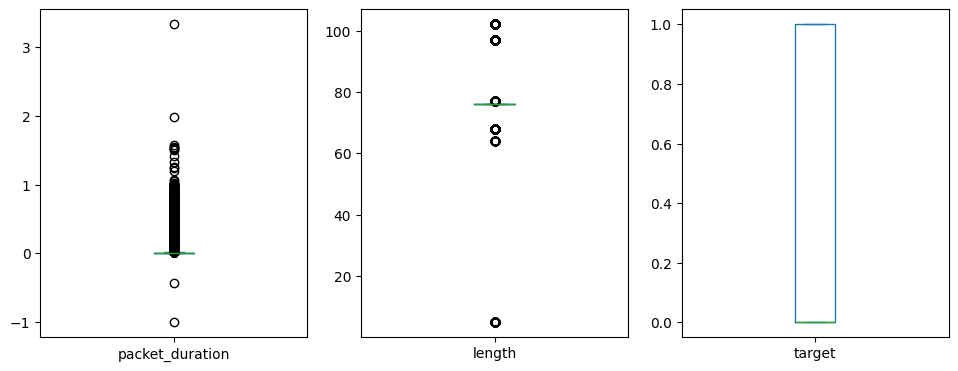

In [67]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

# EDA

array([[<Axes: title={'center': 'packet_duration'}>,
        <Axes: title={'center': 'length'}>]], dtype=object)

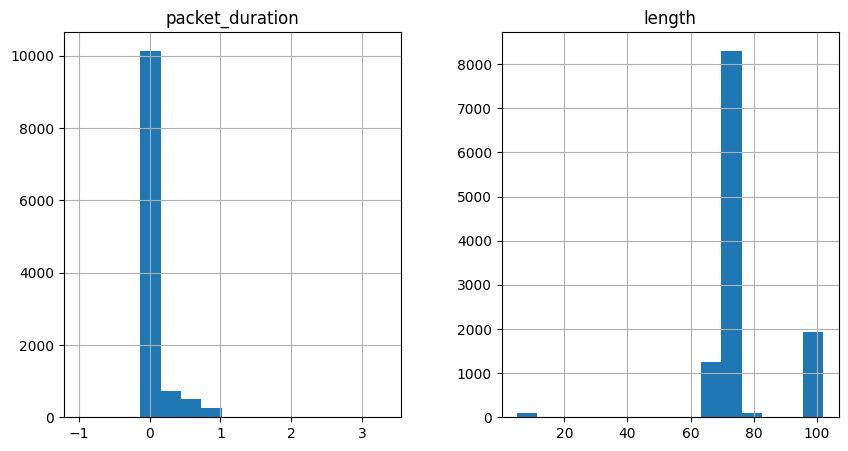

In [68]:
df[['packet_duration', 'length']].hist(bins=15, figsize=(10,5))

In [69]:
df.columns

Index(['packet_duration', 'second_frame', 'src_ip', 'dest_ip', 'protocol',
       'length', 'info', 'target'],
      dtype='object')

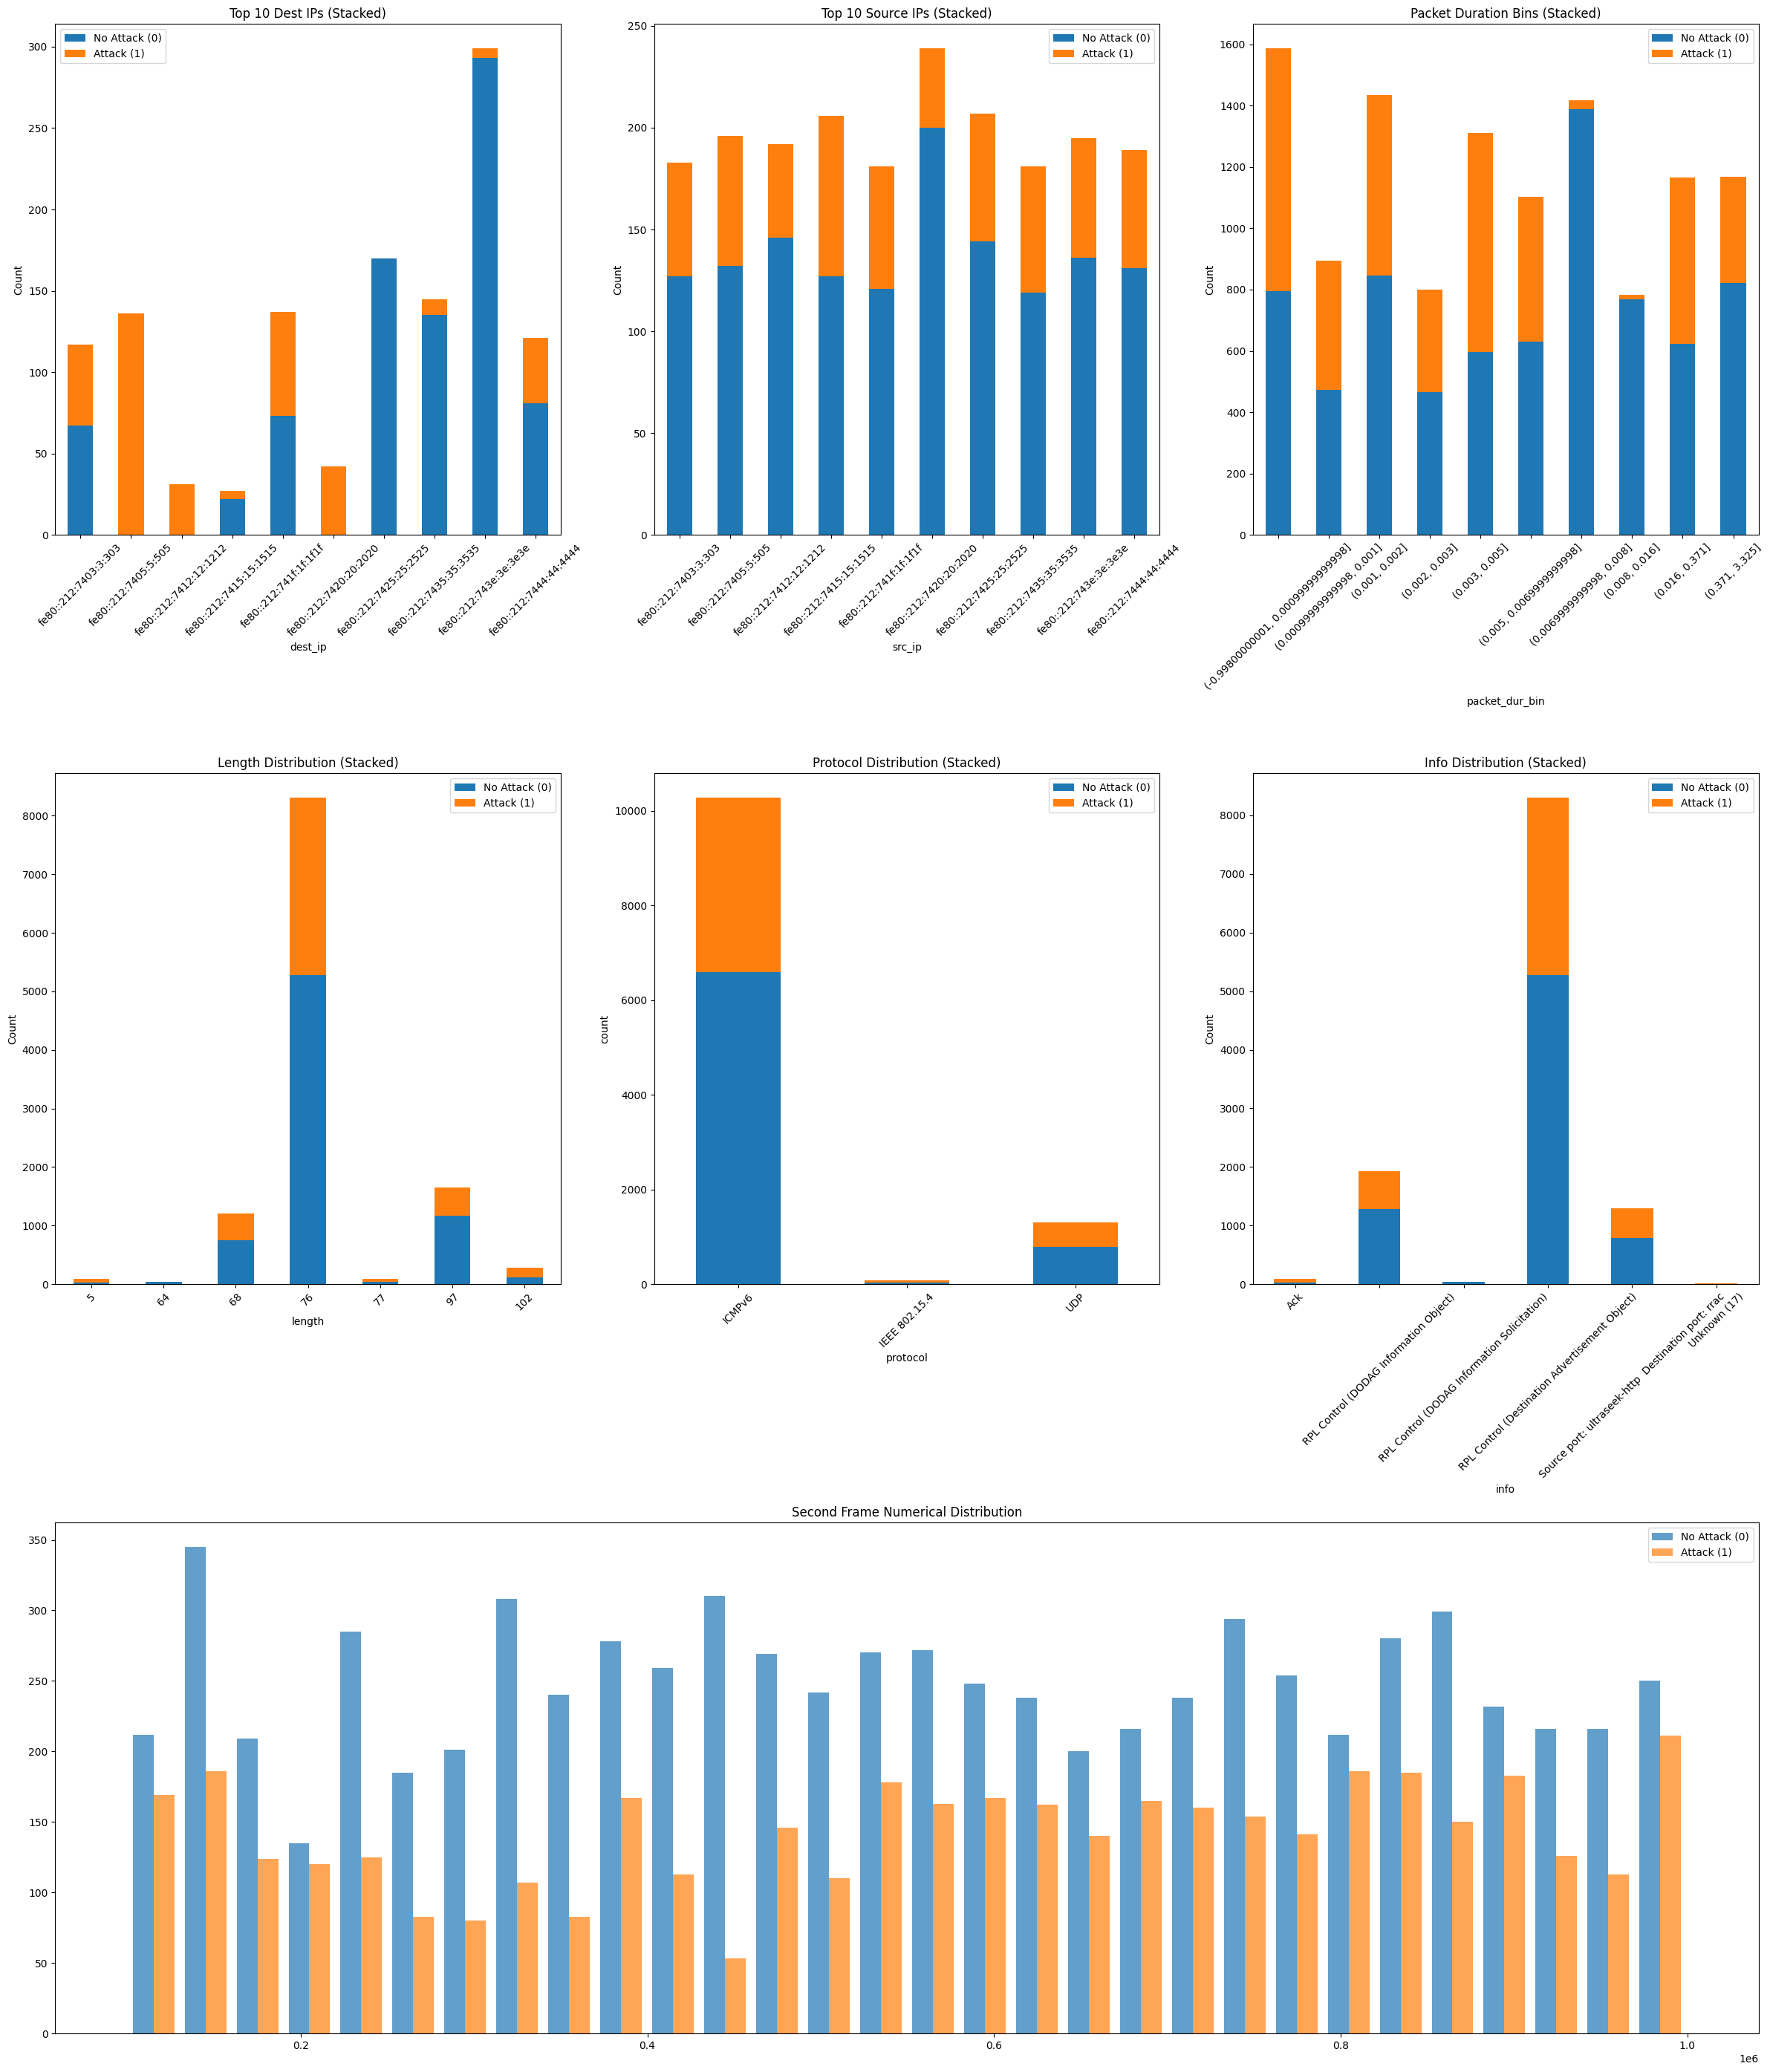

In [70]:
plt.figure(figsize=(24, 28))

rows, cols = 3, 3

# Helper: stacked bar
def stacked_bar(ax, df, col, title):
    tmp = df.groupby([col, 'target']).size().unstack(fill_value=0)
    tmp.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(['No Attack (0)', 'Attack (1)'])

# -------------------- 1. Top 10 DEST IP -----------------------
ax = plt.subplot2grid((rows, cols), (0, 0))
top = df['src_ip'].value_counts().head(10).index
tmp = df[df['dest_ip'].isin(top)]
stacked_bar(ax, tmp, 'dest_ip', "Top 10 Dest IPs (Stacked)")

# -------------------- 2. Top 10 SRC IP ------------------------
ax = plt.subplot2grid((rows, cols), (0, 1))
tmp = df[df['src_ip'].isin(top)]
stacked_bar(ax, tmp, 'src_ip', "Top 10 Source IPs (Stacked)")

# -------------------- 3. Packet Duration (binned) -------------
ax = plt.subplot2grid((rows, cols), (0, 2))
df['packet_dur_bin'] = pd.qcut(df['packet_duration'], q=10)
stacked_bar(ax, df, 'packet_dur_bin', "Packet Duration Bins (Stacked)")
df = df.drop('packet_dur_bin', axis=1)

# -------------------- 4. Length -------------------------------
ax = plt.subplot2grid((rows, cols), (1, 0))
stacked_bar(ax, df, 'length', "Length Distribution (Stacked)")

# -------------------- 5. Protocol -----------------------------
ax = plt.subplot2grid((rows, cols), (1, 1))
stacked_df = df.groupby(['protocol', 'target']).size().unstack(fill_value=0)
stacked_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_title("Protocol Distribution (Stacked)")
ax.set_xlabel("protocol")
ax.set_ylabel("count")
ax.tick_params(axis='x', rotation=45)
ax.legend(['No Attack (0)', 'Attack (1)'])

# -------------------- 6. Info --------------------------------
ax = plt.subplot2grid((rows, cols), (1, 2))
stacked_bar(ax, df, 'info', "Info Distribution (Stacked)")

# -------------------- 7. Second Frame (FULL WIDTH) -----------
ax = plt.subplot2grid((rows, cols), (2, 0), colspan=3)
try:
    df['second_frame_num'] = df['second_frame'].str.extract('(\d+)').astype(float)
    plt.hist([df[df['target']==0]['second_frame_num'],
              df[df['target']==1]['second_frame_num']],
             bins=30, alpha=0.7, label=['No Attack (0)', 'Attack (1)'])
    plt.title('Second Frame Numerical Distribution')
    plt.legend()
except:
    plt.text(0.5, 0.5, "Cannot extract numerical part.", ha='center')
df = df.drop('second_frame_num', axis=1)
# -------------------- Show everything -------------------------
plt.tight_layout()
plt.show()


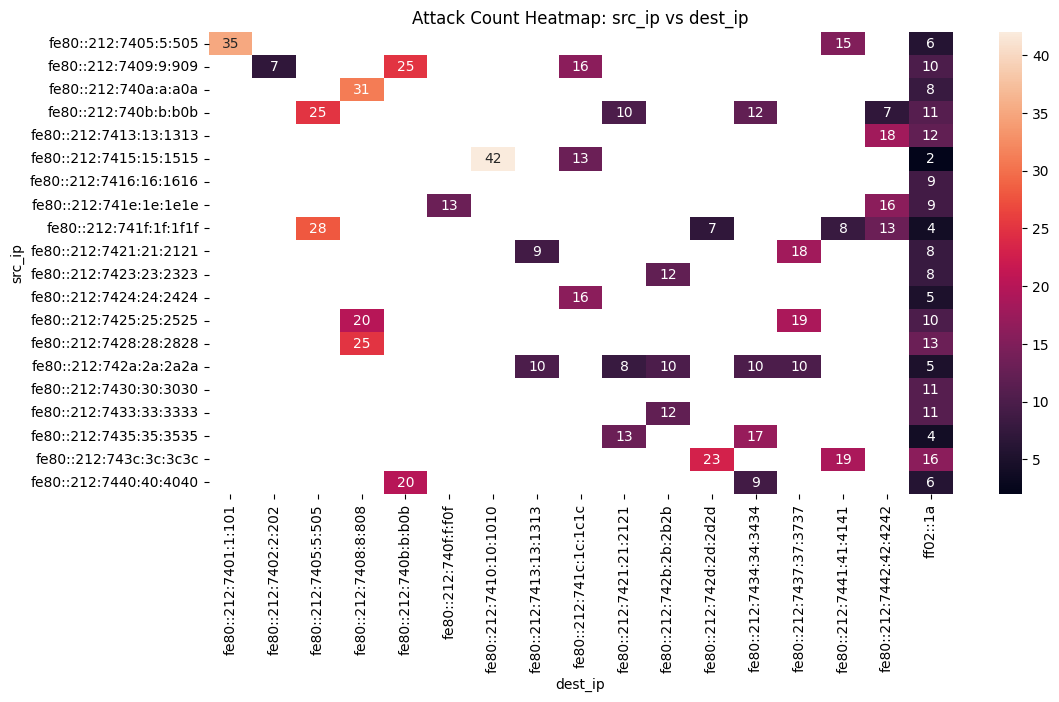

In [71]:
attack_df = df[df['target'] == 1]

top_src = attack_df['src_ip'].value_counts().head(20).index
top_dst = attack_df['dest_ip'].value_counts().head(20).index

pivot = attack_df[attack_df['src_ip'].isin(top_src) &
                  attack_df['dest_ip'].isin(top_dst)] \
        .pivot_table(index='src_ip',
                     columns='dest_ip',
                     values='target',
                     aggfunc='count')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title('Attack Count Heatmap: src_ip vs dest_ip')
plt.show()

# Cleaning & encoding

- handling missing values

In [72]:
df['src_ip'] = df['src_ip'].fillna("::")
df['dest_ip'] = df['dest_ip'].fillna("::")

df['src_ip_int'] = df['src_ip'].apply(lambda x: int(ipaddress.ip_address(x)))
df['dest_ip_int'] = df['dest_ip'].apply(lambda x: int(ipaddress.ip_address(x)))

df = df.drop(columns=['src_ip', 'dest_ip'])
df.columns

Index(['packet_duration', 'second_frame', 'protocol', 'length', 'info',
       'target', 'src_ip_int', 'dest_ip_int'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11663 entries, 0 to 11662
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   packet_duration  11663 non-null  float64
 1   second_frame     11663 non-null  object 
 2   protocol         11663 non-null  object 
 3   length           11663 non-null  int64  
 4   info             11663 non-null  object 
 5   target           11663 non-null  int64  
 6   src_ip_int       11663 non-null  object 
 7   dest_ip_int      11663 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 729.1+ KB


- encoding to one hot encoding 

In [74]:
# protocol feature engineering
protocol_dummies = pd.get_dummies(df['protocol'], prefix='protocol')
df = pd.concat([df, protocol_dummies], axis=1)
df = df.drop(columns=['protocol'])

# info feature engineering
info_dummies = pd.get_dummies(df['info'], prefix='info')
df = pd.concat([df, info_dummies], axis=1)
df = df.drop(columns=['info'])

# second_frame feature engineering
df['second_frame'] = df['second_frame'].str.replace('SF_', '', regex=False).astype('Int64')

# src & dest IP feature engineering
def ipv6_to_feature(ip):
    try:
        x = int(ipaddress.IPv6Address(ip))
        return np.float64((x >> 64) ^ (x & ((1 << 64) - 1)))
    except:
        return 0.0

df['src_ip_int']  = df['src_ip_int'].apply(ipv6_to_feature)
df['dest_ip_int'] = df['dest_ip_int'].apply(ipv6_to_feature)

# Convert all boolean columns to int64 (1 and 0)
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11663 entries, 0 to 11662
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   packet_duration                                           11663 non-null  float64
 1   second_frame                                              11663 non-null  Int64  
 2   length                                                    11663 non-null  int64  
 3   target                                                    11663 non-null  int64  
 4   src_ip_int                                                11663 non-null  float64
 5   dest_ip_int                                               11663 non-null  float64
 6   protocol_ICMPv6                                           11663 non-null  int64  
 7   protocol_IEEE 802.15.4                                    11663 non-null  int64  
 8   protocol_UDP    

In [76]:
df.dtypes

packet_duration                                             float64
second_frame                                                  Int64
length                                                        int64
target                                                        int64
src_ip_int                                                  float64
dest_ip_int                                                 float64
protocol_ICMPv6                                               int64
protocol_IEEE 802.15.4                                        int64
protocol_UDP                                                  int64
info_Ack                                                      int64
info_RPL Control (DODAG Information Object)                   int64
info_RPL Control (DODAG Information Solicitation)             int64
info_RPL Control (Destination Advertisement Object)           int64
info_Source port: ultraseek-http  Destination port: rrac      int64
info_Unknown (17)                               

- splitting the data

In [77]:
X = df.drop(columns=['target'])
y = df['target']

continuous_features = X.iloc[:, :5].columns.tolist()
categorical_features = X.iloc[:, 5:].columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Important for imbalanced datasets
)


# Feature reduction

## Feature extraction

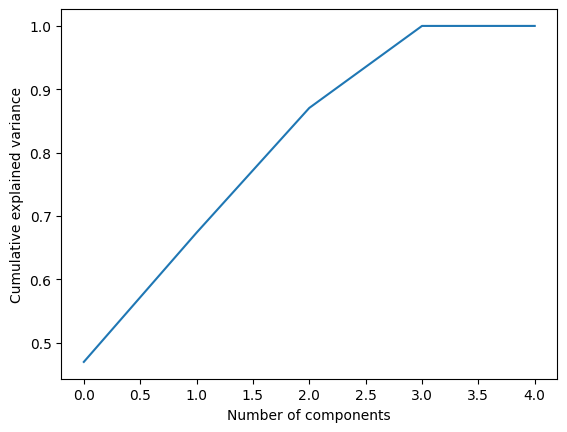

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[continuous_features])
X_test_scaled  = scaler.transform(X_test[continuous_features])

pca_model = PCA()
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca  = pca_model.transform(X_test_scaled)

pca_model.explained_variance_ratio_.sum()

plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

three components are suitable for our case study

## Feature selection

#### Unsupervised techniques

##### Variance

In [79]:
def variance_threshold_selector(X, threshold=0.0):
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(X)
    return X[X.columns[selector.get_support(indices=True)]]

print(f"Initial features: \n{X.columns.shape}, {X.columns.values}")
X_var = variance_threshold_selector(X_train,threshold=0.1)
print(f"Selected features Shape and names: \n{X_var.columns.shape}, {X_var.columns.values}")

Initial features: 
(14,), ['packet_duration' 'second_frame' 'length' 'src_ip_int' 'dest_ip_int'
 'protocol_ICMPv6' 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)']
Selected features Shape and names: 
(7,), ['second_frame' 'length' 'src_ip_int' 'dest_ip_int' 'protocol_ICMPv6'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (Destination Advertisement Object)']


##### correlation

In [80]:
def correlation_selector(X, threshold=0.8):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return X.drop(to_drop, axis=1)

print(f"Initial features: \n{X.columns.values}")
X_corr = correlation_selector(X_train[continuous_features], threshold=0.7)
X_corr = pd.concat([X_corr, X_train[categorical_features]], axis=1)
print(f"Selected features: \n{X_corr.columns.shape}, {X_corr.columns.values}")

Initial features: 
['packet_duration' 'second_frame' 'length' 'src_ip_int' 'dest_ip_int'
 'protocol_ICMPv6' 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)']
Selected features: 
(13,), ['packet_duration' 'second_frame' 'length' 'src_ip_int' 'protocol_ICMPv6'
 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)']


##### Mutual information

In [81]:
def mutual_info_selector(X, y, top_k=4):
    selector = SelectKBest(score_func=mutual_info_classif,k=top_k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

print(f"Initial features: \n{X.columns.values}")
X_mi = mutual_info_selector(X_train[categorical_features], y_train,top_k=5)
X_mi = pd.concat([X_mi, X_train[continuous_features]], axis=1)
print(f"Selected features: \n{X_mi.columns.values}")

Initial features: 
['packet_duration' 'second_frame' 'length' 'src_ip_int' 'dest_ip_int'
 'protocol_ICMPv6' 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)']
Selected features: 
['protocol_ICMPv6' 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)' 'packet_duration' 'second_frame' 'length'
 'src_ip_int' 'dest_ip_int']


#### Supervised techniques

##### Information Gain

In [82]:
def information_gain_selector(X, y, top_k=4):
    selector = SelectKBest(score_func=mutual_info_classif, k=top_k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

print(f"Initial features: \n{X.columns.values}")
X_ig = information_gain_selector(X_train[categorical_features], y_train, top_k=5)
X_ig = pd.concat([X_ig, X_train[continuous_features]], axis=1)
print(f"Selected features: \n{X_ig.columns.values}")

Initial features: 
['packet_duration' 'second_frame' 'length' 'src_ip_int' 'dest_ip_int'
 'protocol_ICMPv6' 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)']
Selected features: 
['protocol_ICMPv6' 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Solicitation)' 'packet_duration'
 'second_frame' 'length' 'src_ip_int' 'dest_ip_int']


##### Chi-squared Test

In [83]:
def chi_squared_selector(X, y, top_k=4):
    selector = SelectKBest(score_func=chi2, k=top_k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

print(f"Initial features: \n{X.columns.values}")
X_chi2 = chi_squared_selector(X_train[categorical_features], y_train, top_k=5)
X_chi2 = pd.concat([X_chi2, X_train[continuous_features]], axis=1)
print(f"Selected features: \n{X_chi2.columns.values}")

Initial features: 
['packet_duration' 'second_frame' 'length' 'src_ip_int' 'dest_ip_int'
 'protocol_ICMPv6' 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)']
Selected features: 
['protocol_IEEE 802.15.4' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'packet_duration' 'second_frame' 'length' 'src_ip_int' 'dest_ip_int']


##### Forward Selection

In [85]:
from sklearn.feature_selection import SequentialFeatureSelector

def forward_selection(X, y, model):
    sfs = SequentialFeatureSelector(estimator=model,
                                    n_features_to_select='auto',  # Use 'auto' or specify number
                                    direction='forward',  # 'forward' or 'backward'
                                    cv=2,  # cross-validation folds
                                    n_jobs=-1,  # parallelism
                                    scoring='accuracy')
    sfs.fit(X, y)
    # Get selected feature indices
    selected_indices = sfs.get_support(indices=True)
    return X[X.columns[selected_indices]]

# Test the function
model = DecisionTreeClassifier(criterion='gini', random_state=42)

print(f"Initial features: \n{X.columns.values}")
X_forward = forward_selection(X_train, y_train, model)
print(f"Selected features: \n{X_forward.columns.shape}, {X_forward.columns.values}")

Initial features: 
['packet_duration' 'second_frame' 'length' 'src_ip_int' 'dest_ip_int'
 'protocol_ICMPv6' 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)']
Selected features: 
(7,), ['second_frame' 'protocol_IEEE 802.15.4' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)' 'info_Unknown (17)']


##### Backward Elimination

In [87]:
from sklearn.feature_selection import SequentialFeatureSelector

def backward_elimination(X, y, model):
    sfs = SequentialFeatureSelector(
        estimator=model,
        n_features_to_select='auto',  # Automatically determines optimal number
        direction='backward',  # This makes it backward elimination
        cv=2,
        scoring='accuracy',
        n_jobs=-1
    )
    sfs.fit(X, y)
    selected_indices = sfs.get_support(indices=True)
    return X[X.columns[selected_indices]]

model = DecisionTreeClassifier(criterion='gini', random_state=42)

print(f"Initial features: \n{X.columns.values}")
X_backward = backward_elimination(X_train, y_train, model)
print(f"Selected features: \n{X_backward.columns.shape}, {X_backward.columns.values}")

Initial features: 
['packet_duration' 'second_frame' 'length' 'src_ip_int' 'dest_ip_int'
 'protocol_ICMPv6' 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)']
Selected features: 
(7,), ['second_frame' 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)']


##### Genetic Algorithm

In [ ]:
def genetic_algorithm_selector(X, y, model):
    selector = GAFeatureSelectionCV(model,
                                    cv=2,
                                    scoring='accuracy',
                                    population_size=10,
                                         generations=5,
                                         tournament_size=5,
                                         elitism=True,
                                         crossover_probability=0.9,
                                         mutation_probability=0.1,
                                         criteria='max',
                                         algorithm='eaMuPlusLambda',
                                         n_jobs=3,
                                         verbose=True,
                                         keep_top_k=4)
    selector.fit(X, y)
    return X[X.columns[selector.support_]]

model = DecisionTreeClassifier(criterion='gini', random_state=42)

print(f"Initial features: \n{X.columns.values}")
X_genetic = genetic_algorithm_selector(X_train, y_train, model)
print(f"Selected features: \n{X_genetic.columns.shape}, {X_genetic.columns.values}")

Initial features: 
['packet_duration' 'second_frame' 'length' 'src_ip_int' 'dest_ip_int'
 'protocol_ICMPv6' 'protocol_IEEE 802.15.4' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Object)'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  Destination port: rrac'
 'info_Unknown (17)']
gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	10    	0.83314	0.0777934  	0.916935   	0.715756   
1  	20    	0.897192	0.015355   	0.916935   	0.857556   
2  	20    	0.904148	0.00840837 	0.916935   	0.89657    
3  	20    	0.916935	0          	0.916935   	0.916935   
4  	20    	0.916935	0          	0.916935   	0.916935   
5  	20    	0.916935	0          	0.916935   	0.916935   
Selected features: 
(7,), ['second_frame' 'protocol_UDP' 'info_Ack'
 'info_RPL Control (DODAG Information Solicitation)'
 'info_RPL Control (Destination Advertisement Object)'
 'info_Source port: ultraseek-http  De

#### Evaluate Model performance after feature selection

##### Evaluator function

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) #Train the model using training sets
    y_pred = model.predict(X_test)#Predict using testing set
    accuracy = accuracy_score(y_test, y_pred)#Using Accuracy metric, Compare the predicted values with the testing target values
    return accuracy

##### Evaluate Feature extraction

In [ ]:
pca_model = PCA(3)

X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca  = pca_model.transform(X_test_scaled)

X_train_final = np.hstack([X_train_pca,X_train[categorical_features].values])
X_test_final = np.hstack([X_test_pca,X_test[categorical_features].values])

model = DecisionTreeClassifier(criterion='gini', random_state=42)

accuracy = evaluate_model(model,X_train_final,X_test_final,y_train,y_test)

print("Variance explained:",pca_model.explained_variance_ratio_.sum())
print("Accuracy:", accuracy)

Variance explained: 0.8705063390746559
Accuracy: 0.8624089155593656


##### Evaluate Feature selection

In [ ]:
# Create list of selected feature sets (use only the selected features)
selected_features = [
    X_train,                    # Original (all features)
    X_var,                      # Variance Threshold selected features
    X_corr,                     # Correlation selected features  
    X_mi,                       # Mutual Information selected features
    X_ig,                       # Information Gain selected features
    X_chi2,                     # Chi-squared selected features
    X_forward,                  # Forward Selection
    X_backward,                 # Backward Elimination
    X_genetic                   # Genetic Algorithm
]

selected_feature_names = ['Original', 'Variance Threshold', 'Correlation','Mutual Information', 'Information Gain', 'Chi-squared Test', 'Forward Selection', 'Backward Elimination', 'Genetic Algorithm']

results = []

model = DecisionTreeClassifier(criterion='gini', random_state=42)

for name, X_selected in zip(selected_feature_names, selected_features):
    # Apply the same feature selection to the test set
    X_test_selected = X_test[X_selected.columns]  # Select same columns from test set
    accuracy = evaluate_model(model, X_selected, X_test_selected, y_train, y_test)
    results.append({'Method': name, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)
results_df

,Method,Accuracy
0,Original,0.910416
1,Variance Threshold,0.924561
2,Correlation,0.916845
3,Mutual Information,0.913845
4,Information Gain,0.918131
5,Chi-squared Test,0.918131
6,Forward Selection,0.977282
7,Backward Elimination,0.966138
8,Genetic Algorithm,0.963138


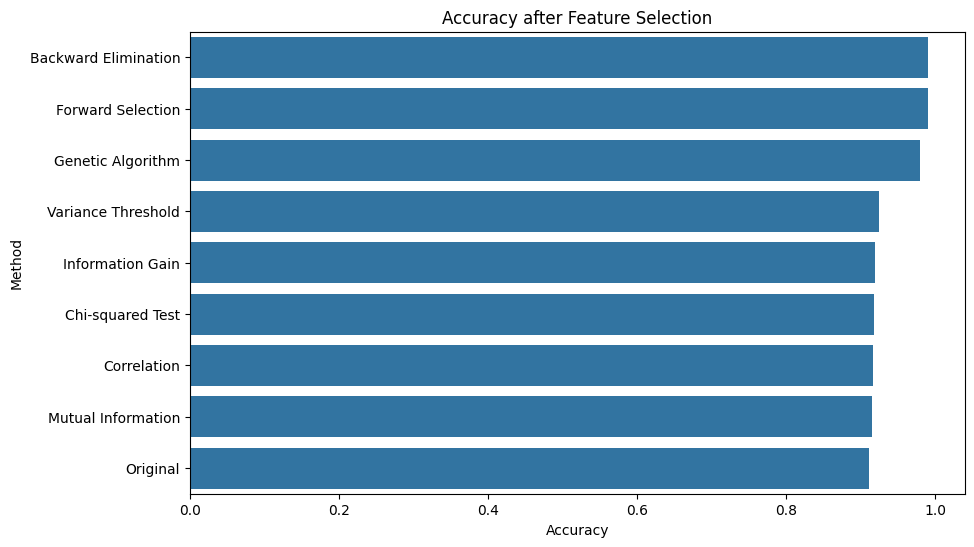

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Method', data=results_df.sort_values(by='Accuracy', ascending=False))
plt.title('Accuracy after Feature Selection')
plt.show()

Backware elimination & Forward Selection made a great job; 99.01% accuracy !!!

Genetic algorithm in the 2nd place 94.77% accuracy

And PCA in the last place 86.24%.

## Best model after Dimensiality reduction

              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99      1483
      Attack       0.99      0.98      0.99       850

    accuracy                           0.99      2333
   macro avg       0.99      0.99      0.99      2333
weighted avg       0.99      0.99      0.99      2333



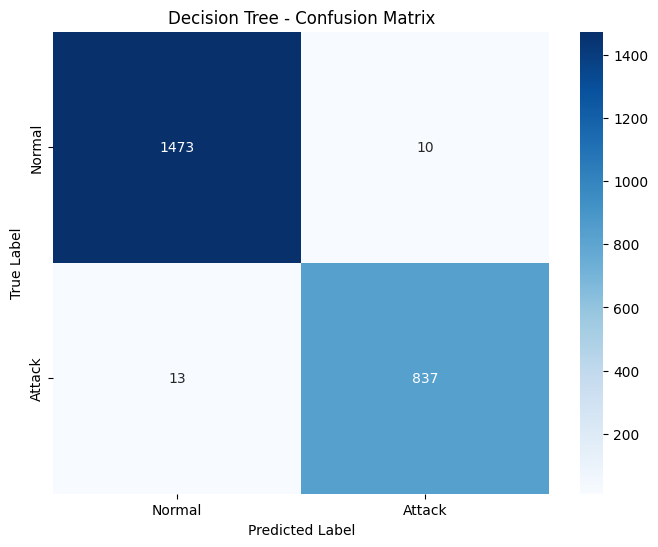

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
X_backward = X_train[['second_frame']] 
model.fit(X_backward, y_train)
X_test_selected = X_test[X_backward.columns]

# save the tree :
joblib.dump(model, 'decision_tree_model.pkl')


y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Attack'], 
            yticklabels=['Normal', 'Attack'])
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Hyperparameter tunning 

#### Choose the importante features

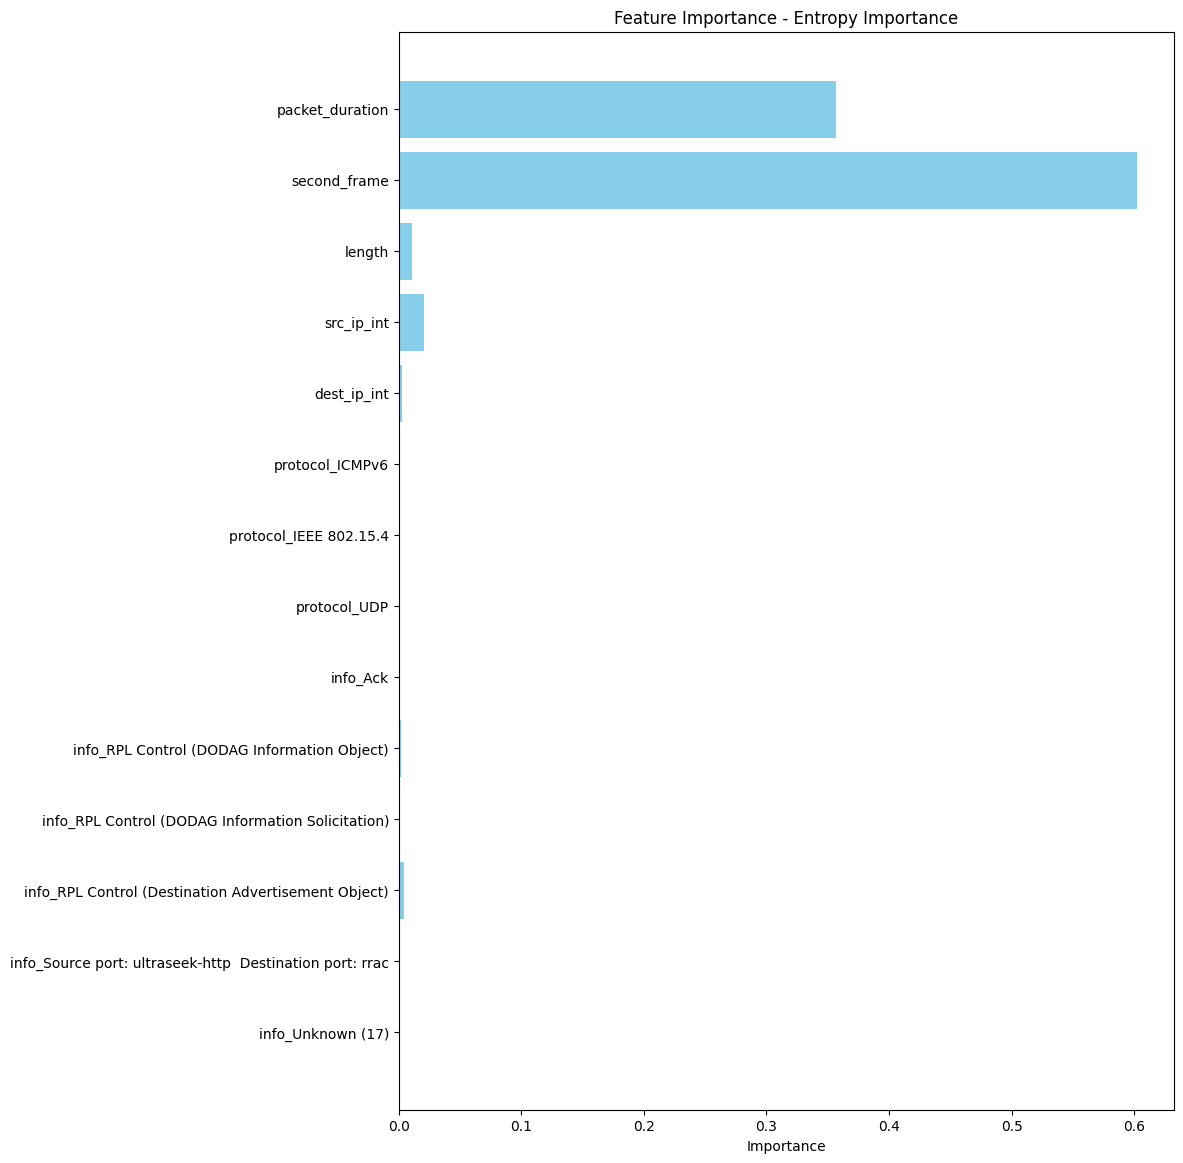

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_ 
feature_imp_df = pd.DataFrame(
                              {'Feature': X_train.columns.values,
                               'Importance':importances
                               }).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 14))
plt.barh(X_train.columns.values, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Entropy Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [ ]:
X_hyper = X[['packet_duration', 'second_frame', 'length', 'src_ip_int']]
y_hyper = y

#### Split into train, val, test

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_hyper, y_hyper, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

#### Grid Search

In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1,3,4,8,10,15,20]
}
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params) # only first one returned if many at same heigh score 

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
test_accuracy = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.9052721817402486


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1497
           1       0.87      0.87      0.87       836

    accuracy                           0.91      2333
   macro avg       0.90      0.90      0.90      2333
weighted avg       0.91      0.91      0.91      2333



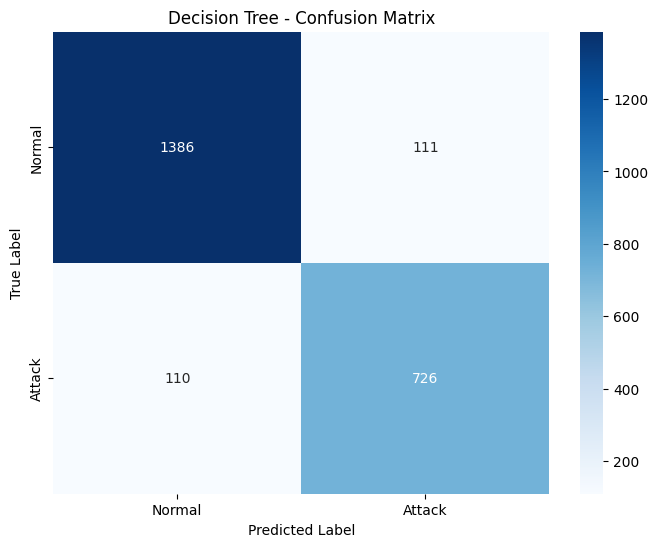

In [ ]:
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Attack'], 
            yticklabels=['Normal', 'Attack'])
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Clustering as Prediction

## K-means

## Agglomerative Clustering